In [10]:
## Script to evaluate the result of the LM testing on the simulated data

# Libraries

In [11]:
source('MS0_Libraries.r')

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
"incomplete final line found by readTableHeader on '../conda_environment/Environment_Configs.csv'"


[1] "/home/icb/corinna.losert/miniconda3/envs/scgrn_R_4_1//lib/R/library"


In [12]:
source('MS4_Plot_Config.r')

# Parameters

In [13]:
### Parameters for simulated co-eQTL Data

In [14]:
### Path to saved simulation results from previous script
data_path_sim = "../results/current/A1/"

In [15]:
### Parameters for simulated co-EQTL data (names of the datasets)

In [16]:
sim_data_name_counts = 'A1_4_Simulated_Counts'

In [17]:
sim_data_name_true_cor = 'A1_4_Simulation_Specified_Correlation'

In [18]:
sim_data_name_lm = 'A1_6_Calc_LM_'

In [19]:
cor_data_name = 'A1_5_Calc_Cor_Ext_'

In [20]:
sim_data_name_gene_summary = 'A1_4_Gene_Summary'

In [21]:
#### Simulated variant to load

In [22]:
variant = 'wijstMono3' 

In [23]:
coeqtl_variant = 'scaling'

In [24]:
z_value_handle = ''  # empty = NA, or max

In [25]:
non_zero_counts_filter = 10

# Functions

In [26]:
source('MS1_Functions.r')

# Data

## Define Links to individual datasets

In [27]:
## Get the specified true correlations
cor_data = function( ){
    path = paste0(data_path_sim,  sim_data_name_true_cor,variant, '_', coeqtl_variant, '.csv')
    print(file.info(path)$mtime)
    read.csv(path)
  }  


In [28]:
## Get the results from the co-eQTL testing with a linear model on the simulated data
lm_data = function( z_value_handle, non_zero_counts_filter){
    path = paste0(data_path_sim,  sim_data_name_lm, variant, coeqtl_variant,z_value_handle,non_zero_counts_filter, '.csv')
    print(file.info(path)$mtime)
    read.csv(path)
    

}

In [29]:
## Function to load simulated counts
count_data = function(){
    path = paste0(data_path_sim,  sim_data_name_counts ,  variant, coeqtl_variant, '.csv.gz')
    print(file.info(path)$mtime)
    fread(path)
    }

In [30]:
## Function to load calculated correlations

In [31]:
cor_data_calc = function( ){
    path = paste0(data_path_sim,  cor_data_name , variant, coeqtl_variant, '.csv')
    print(file.info(path)$mtime)
    read.csv(path)
    }

In [32]:
## Function to load gene summary

In [33]:
## Function to load  specified gene summary){
get_gene_summary = function( ){
    path = paste0(data_path_sim,  sim_data_name_gene_summary  , '_', variant, '_',  coeqtl_variant, '.csv.gz')
    print(file.info(path)$mtime)
    fread(path)
    }

## Get the specification for the simulation ( truely specified correlations per gene-pair and individual)

In [35]:
### Get the specification of the correlation and expression of the different gene-pairs before simulation

In [36]:
### Get the data

In [37]:
group1_data = cor_data()

[1] "2025-01-22 20:06:28 CET"


In [38]:
head(group1_data,2)

,X,gene1,gene2,gene1_mu,gene2_mu,gene1_size,gene2_size,genotype,correlation,gene_pair,ind,ident
,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<int>,<chr>
1,20001,gene1_1,gene2_1,1,16,12,12,XX,0,gene1_1;gene2_1,1,XX;1
2,20004,gene1_4,gene2_4,24,9,12,12,XX,0,gene1_4;gene2_4,1,XX;1


In [39]:
unique(group1_data$correlation)

[1] 0.00 0.05 0.10

In [40]:
### Get the unique gene1 and gene 2 pairs of the specification

In [41]:
correlation_pairs = unique(group1_data[,c('gene1', 'gene2')])

In [42]:
### Get the true specified correlations between gene-pairs for each genotype

In [43]:
true_correlations =  unique(group1_data[,c('gene1', 'gene2', 'correlation', 'genotype')])

In [44]:
### Format to calculate correlation difference between the genotypes ( needs to be adapted in case of 3 genotypes!)

In [45]:
true_correlations = true_correlations %>% dcast(gene1 + gene2 ~ genotype, value.var = 'correlation')

In [46]:
head(true_correlations,2)

,gene1,gene2,XX,XY,YY
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,gene1_1,gene2_1,0,0.05,0.1
2,gene1_10,gene2_10,0,0.05,0.1


In [47]:
### Adjust column names depending on simulated genotypes
if(ncol(true_correlations) == 4){
    colnames(true_correlations) = c('gene1', 'gene2', 'group1_correlation', 'group2_correlation')
    true_correlations$cor_diff = true_correlations$group2_correlation - true_correlations$group1_correlation
    }
if(ncol(true_correlations) == 5){
    colnames(true_correlations) = c('gene1', 'gene2', 'group1_correlation', 'group2_correlation', 'group3_correlation')
    true_correlations$cor_diff = true_correlations$group3_correlation - true_correlations$group1_correlation
    }
    

In [49]:
head(true_correlations,2)

,gene1,gene2,group1_correlation,group2_correlation,group3_correlation,cor_diff
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,gene1_1,gene2_1,0,0.05,0.1,0.1
2,gene1_10,gene2_10,0,0.05,0.1,0.1


## Get calculated correlations 

In [50]:
## Get the calculated correlations for each individual

In [51]:
cor_data1 = cor_data_calc()

[1] "2025-01-22 17:20:14 CET"


In [52]:
head(cor_data1,2)

,X,gene1,gene2,ncells,ind,spearman_raw,weighted_spearman,weighted_spearman_non_zero_counts,weighted_spearman_non_zero_genes,weighted_spearman_ranks,pearson_raw,weighted_pearson,weighted_pearson_non_zero_counts,weighted_pearson_non_zero_genes,spearman,scaled_spearman_ranks,pearson
,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,gene1_1,gene2_1,27,XX;1,0.1161193,-0.1220625,-0.1298579,-0.09166325,-0.09803769,0.2113667,-0.1109233,-0.1183258,-0.08078166,-0.06134705,-0.04833248,-0.05466586
2,2,gene1_10,gene2_10,27,XX;1,-0.1765766,-0.2493647,-0.2521145,-0.23848992,-0.25471427,-0.1530650,-0.2026294,-0.2074659,-0.18440774,-0.22661089,-0.22661089,-0.16753474


In [53]:
## Transform to long format per calculated correlation measure
cor_data1_long = melt(cor_data1, id = c('gene1', 'gene2', 'ncells', 'ind' ))

##  Get gene summaries

In [54]:
## Get the summary stats for each individual and gene of the simulated data

In [55]:
gene_summary1 = get_gene_summary()

[1] "2025-01-22 20:42:11 CET"


In [56]:
head(gene_summary1,2)

V1,variable,basemean,ncells,ind,amount_zero_counts,amount_cells,mean_counts,max_counts,min_counts,variance_counts,percentage_zero,percentage_zero_bin
<int>,<chr>,<dbl>,<int>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
1,gene1_1,1,27,XX;1,12,27,1.00000,4,0,1.307692,44.44444,"(40,60]"
2,gene2_1,16,27,XX;1,0,27,17.11111,31,1,60.794872,0.00000,"(-0.001,5]"


In [57]:
unique(gene_summary1$amount_zero_counts)

[1]  12   0   1  15   2  11  27   5   9   3  25  18  16  17  20  14  24  26
 [19]  13  19  23  21   6  22  10   4   7   8  32  50  36  81  82  33  78  53
 [37]  55  56  38  63  48  75  80  67  35  69  39  30  65  52  66  77  74  31
 [55]  76  64  60  59  73  83  79  34  37  70  54  68  61  71  58  46  28  49
 [73]  57  41  40  51  62  47  72  29  44  42  45  43  93  92  87  85  90  86
 [91]  84  89  91  88  94  95  96 117 113 103 106 110 105 112  97 109 108 114
[109] 107 111 116 115 104 102 101 100  98  99

In [58]:
unique(gene_summary1$ind)

[1] "XX;1"  "XX;2"  "XX;3"  "XX;4"  "XX;5"  "XX;6"  "XX;7"  "XX;8"  "XX;9" 
[10] "XX;10" "XX;11" "XX;12" "XX;13" "XX;14" "XX;15" "XX;16" "XX;17" "XX;18"
[19] "XX;19" "XX;20" "XY;1"  "XY;2"  "XY;3"  "XY;4"  "XY;5"  "XY;6"  "XY;7" 
[28] "XY;8"  "XY;9"  "XY;10" "XY;11" "XY;12" "XY;13" "XY;14" "XY;15" "YY;1" 
[37] "YY;2"  "YY;3"  "YY;4"  "YY;5"  "YY;6"  "YY;7"  "YY;8"  "YY;9"  "YY;10"

## Get estimated LM results

In [59]:
## Get the results from the linear model of the co-eQTL testing on the simulated data

In [60]:
lm_result = lm_data( z_value_handle, non_zero_counts_filter)

[1] "2025-07-13 22:40:55 CEST"


In [61]:
head(lm_result,2)

,X,gene1,gene2,variable,term,estimate,std.error,statistic,p.value,term_z,⋯,var_mean_counts.y,percentage_zero.y,var_percentage_zero.y,mean_ncells.y,sd_ncells.y,group1_correlation,group2_correlation,group3_correlation,cor_diff,cor_diff_z
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,gene1_1,gene2_1,pearson,as.numeric(genotype),0.05732395,0.01859128,3.083378,0.003978194,as.numeric(genotype),⋯,NA,0.05847953,NA,56.37778,32.58785,0,0.05,0.1,0.1,0.7358786
2,2,gene1_1,gene2_1,spearman_raw,as.numeric(genotype),0.03689113,0.02225331,1.657782,0.106299339,as.numeric(genotype),⋯,NA,0.05847953,NA,56.37778,32.58785,0,0.05,0.1,0.1,0.7358786


In [62]:
unique(lm_result$variable)

[1] "pearson"                           "spearman_raw"                     
 [3] "scaled_spearman_ranks"             "weighted_pearson_non_zero_genes"  
 [5] "weighted_pearson"                  "weighted_pearson_non_zero_counts" 
 [7] "weighted_spearman_ranks"           "weighted_spearman"                
 [9] "weighted_spearman_non_zero_genes"  "spearman"                         
[11] "weighted_spearman_non_zero_counts" "pearson_raw"

In [63]:
nrow(lm_result)

[1] 80016

In [64]:
### Get the mean amount of cells as mean between the mean cells for genotype 1 and 2

In [65]:
lm_result$ncells = (lm_result$mean_ncells.x + lm_result$mean_ncells.y) /2

# Analyse the co-eqtl testing (lm) results and compare the different correlation measures

## MSE of estimate (effect size vs. estimated beta)

In [66]:
## Calculate the MSE: true beta ( = specified correlation difference) vs. estimated beta (= result from the linear model)

In [67]:
lm_result$estimate_diff = (lm_result$estimate - as.numeric(lm_result$cor_diff))^2
# ! check that the right direction of the correlation difference between genotypes is specified

In [68]:
head(lm_result[,1:25],2)

,X,gene1,gene2,variable,term,estimate,std.error,statistic,p.value,term_z,⋯,p.value_adj,amount_zero_counts.x,var_amount_zero_counts.x,mean_counts.x,var_mean_counts.x,percentage_zero.x,var_percentage_zero.x,mean_ncells.x,sd_ncells.x,amount_zero_counts.y
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<lgl>,<dbl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>
1,1,gene1_1,gene2_1,pearson,as.numeric(genotype),0.05732395,0.01859128,3.083378,0.003978194,as.numeric(genotype),⋯,26.5266,22.75556,NA,0.9970929,NA,40.4551,NA,56.37778,32.58785,0.02222222
2,2,gene1_1,gene2_1,spearman_raw,as.numeric(genotype),0.03689113,0.02225331,1.657782,0.106299339,as.numeric(genotype),⋯,708.8040,22.75556,NA,0.9970929,NA,40.4551,NA,56.37778,32.58785,0.02222222


In [69]:
### Per mean ncells and correlation measure calculate the mean MSE

In [70]:
mse_measure_cell = lm_result %>% group_by(variable, ncells) %>% summarise(mse = mean(estimate_diff))

`summarise()` has grouped output by 'variable'. You can override using the
`.groups` argument.


In [71]:
head(mse_measure_cell,2)

variable,ncells,mse
<chr>,<dbl>,<dbl>
pearson,56.37778,0.002279858
pearson_raw,56.37778,0.010217023


In [72]:
## Plot the MSE

In [73]:
options(repr.plot.width=10, repr.plot.height=5)
mse_plot = ggplot(mse_measure_cell, aes(reorder(ncells, as.numeric(ncells)), reorder(variable, mse))) +
  geom_tile(aes(fill = mse)) +
  geom_text(aes(label = round(mse, 5))) +
  scale_fill_gradient(low = "white", high = "red") + xlab('ncells') + ylab('correlation measurement') + plot_config# + facet_wrap(comparison~., scales = 'free')

In [75]:
#mse_plot

In [76]:
### Save the plot as PDF (for one scenario, including all measures)
pdf(paste0('figures/A1_8/A1_8_MSE_beta_correlation_diff_', variant, '_', coeqtl_variant,  '.pdf'), width =5, height =3)
print(mse_plot)
dev.off()

pdf 
  2

In [77]:
## Get an overview of the ranking and MSE of the measures

In [2056]:
### Save the MSE measurements to generate a plot for all scenarios

In [2057]:
mse_measure_cell$variant = variant

In [2058]:
write.csv(mse_measure_cell, paste0('figures/A1_8/MSE_table', variant, '.csv'))

## Evaluation with ROC plot

In [78]:
### Investigate the different correlation measurements using ROC curves

In [79]:
### Calculated the adjusted p-value for the z-value based testing

In [80]:
lm_result$p.value_z_adj = lm_result$p.value_z * lm_result$amount_tests

In [81]:
### Calculate the amount of non zero counts for gene1 and gene2

In [82]:
lm_result$amount_non_zero_counts.x = lm_result$ncells - lm_result$amount_zero_counts.x
lm_result$amount_non_zero_counts.y = lm_result$ncells - lm_result$amount_zero_counts.y

In [83]:
### Get copy of lm result as evaluation dataset

In [84]:
evaluation = lm_result

In [85]:
sort(colnames(evaluation))

[1] "amount_non_zero_counts.x" "amount_non_zero_counts.y"
 [3] "amount_tests"             "amount_zero_counts.x"    
 [5] "amount_zero_counts.y"     "cor_diff"                
 [7] "cor_diff_z"               "estimate"                
 [9] "estimate_diff"            "estimate_z"              
[11] "gene1"                    "gene2"                   
[13] "group1_correlation"       "group2_correlation"      
[15] "group3_correlation"       "mean_counts.x"           
[17] "mean_counts.y"            "mean_ncells.x"           
[19] "mean_ncells.y"            "ncells"                  
[21] "p.value"                  "p.value_adj"             
[23] "p.value_z"                "p.value_z_adj"           
[25] "percentage_zero.x"        "percentage_zero.y"       
[27] "sd_ncells.x"              "sd_ncells.y"             
[29] "statistic"                "statistic_z"             
[31] "std.error"                "std.error_z"             
[33] "term"                     "term_z"                  
[35] "var_amount_zero_counts.x" "var_amount_zero_counts.y"
[37] "var_mean_counts.x"        "var_mean_counts.y"       
[39] "var_percentage_zero.x"    "var_percentage_zero.y"   
[41] "variable"                 "X"

In [86]:
unique(evaluation$cor_diff)

[1] 0.1 0.0

In [87]:
## Specify which correlation measures to include

In [88]:
unique(evaluation$variable)

[1] "pearson"                           "spearman_raw"                     
 [3] "scaled_spearman_ranks"             "weighted_pearson_non_zero_genes"  
 [5] "weighted_pearson"                  "weighted_pearson_non_zero_counts" 
 [7] "weighted_spearman_ranks"           "weighted_spearman"                
 [9] "weighted_spearman_non_zero_genes"  "spearman"                         
[11] "weighted_spearman_non_zero_counts" "pearson_raw"

In [89]:
evaluation = evaluation[evaluation$variable %in% c('pearson', 'weighted_pearson_non_zero_genes', 'weighted_spearman_non_zero_genes','spearman' ),]

In [90]:
# Define when there is a co-eQTL and when not (cor_diff == 0 --> no co-eQTL; cor_diff > 0 --> co-eQTL)
# Prediction Task: predict 1 = coeqtl 

In [91]:
evaluation$coeqtl_ident = 0
evaluation$coeqtl_ident[evaluation$cor_diff != 0] = 1

In [92]:
## Specify Plot based on adjusted p-value from testing with correlation 
rocplot = ggplot(evaluation[,], aes(m =- p.value_adj, # use adjusted p-value as classifier for co-eQTL
                                    d = as.numeric(coeqtl_ident),   # predict whether co-eQTL or not
                                    color = variable))+ geom_roc(n.cuts=10, size = 0.1,pointsize = 0.1,  labels= FALSE)  + facet_wrap(ncells~.) + ggtitle(paste0('Correlation Difference: ', max(abs(unique(evaluation$cor_diff))))) 

In [93]:
options(repr.plot.width=30, repr.plot.height=7)
plot1 = rocplot +  geom_abline(slope = 1, intercept = 0) + theme(text = element_text(size = 20)) + ggtitle('P_value_adj')  + plot_config

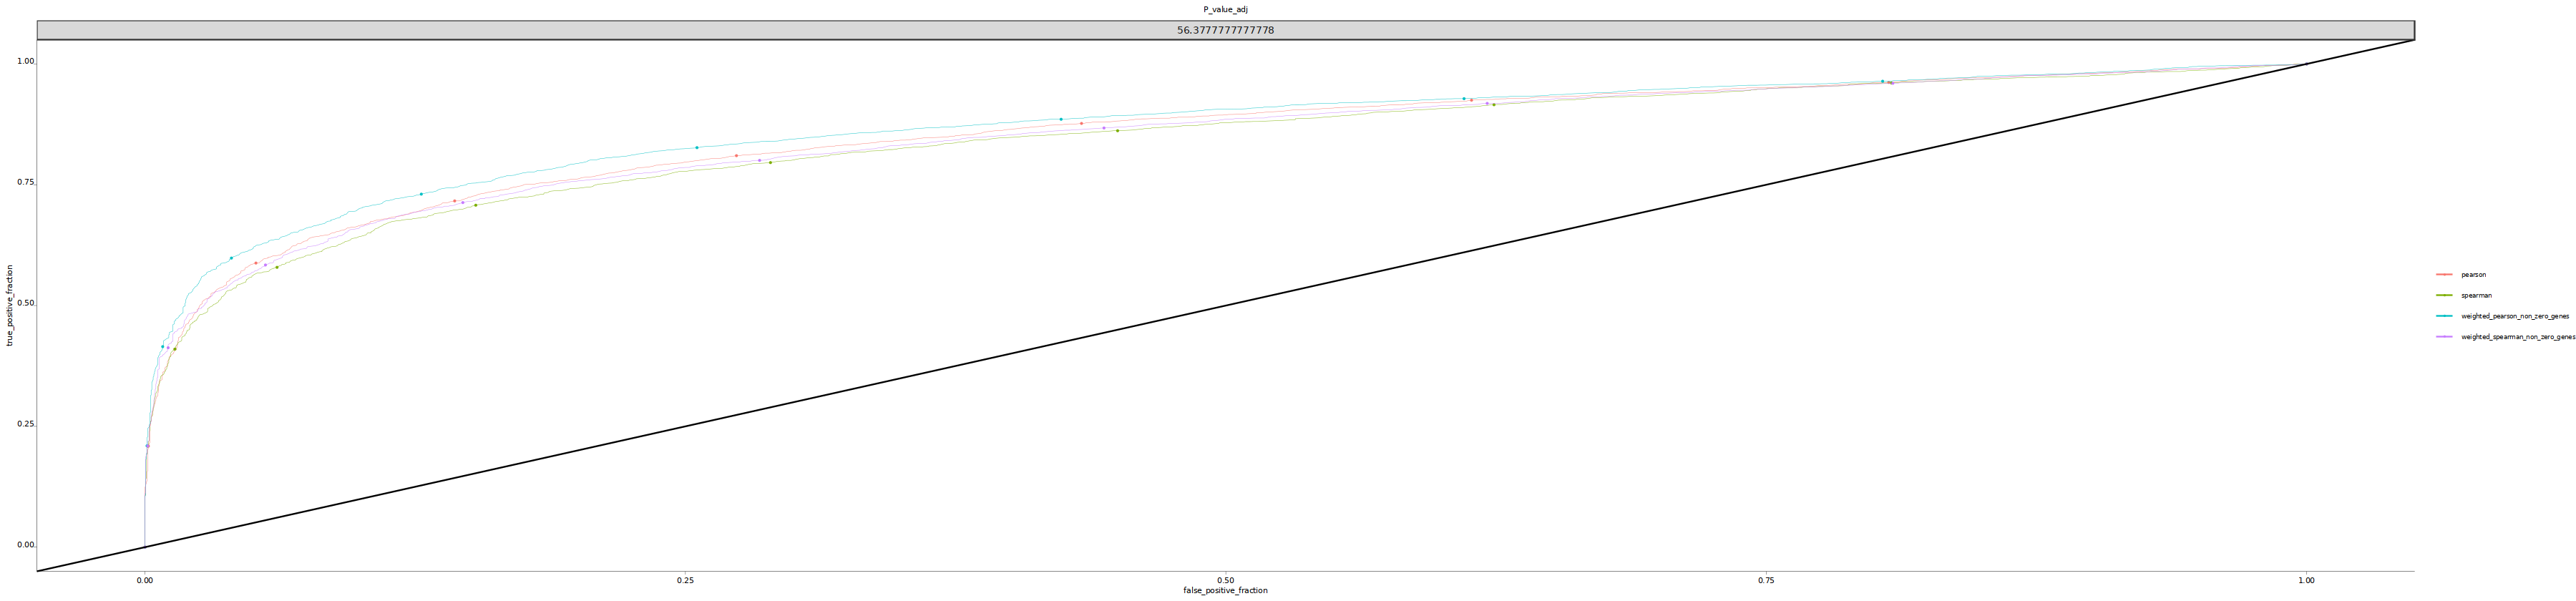

In [94]:
plot1

In [95]:
### Save the plot as PDF

In [96]:
### Save the plot as PDF
pdf(paste0('figures/A1_8/A1_8_ROC_correlation_based_', variant, '_', coeqtl_variant,  '.pdf'), width =5, height =3)
print(plot1)
dev.off()

pdf 
  2

In [97]:
evaluation_data = evaluation[,c('gene1', 'gene2', 'variable', 'p.value_adj', 'cor_diff', 'coeqtl_ident')]

In [98]:
head(evaluation_data,2)

,gene1,gene2,variable,p.value_adj,cor_diff,coeqtl_ident
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,gene1_1,gene2_1,pearson,26.52660,0.1,1
4,gene1_1,gene2_1,weighted_pearson_non_zero_genes,26.49989,0.1,1


In [99]:
### Save the data
write.csv(evaluation_data, paste0('figures/A1_8/A1_8_ROC_correlation_based_', variant, '_', coeqtl_variant,  '_data.csv'))

In [100]:
unique(evaluation_data$coeqtl_ident)

[1] 1 0

In [104]:
### Evaluate by different percentage zero bins (calculating AUC)

In [105]:
head(evaluation[,1:20],2)

,X,gene1,gene2,variable,term,estimate,std.error,statistic,p.value,term_z,estimate_z,std.error_z,statistic_z,p.value_z,amount_tests,p.value_adj,amount_zero_counts.x,var_amount_zero_counts.x,mean_counts.x,var_mean_counts.x
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<lgl>,<dbl>,<lgl>
1,1,gene1_1,gene2_1,pearson,as.numeric(genotype),0.05732395,0.01859128,3.083378,0.003978194,as.numeric(genotype),0.4236356,0.1322189,3.204046,0.002887386,6668,26.52660,22.75556,NA,0.9970929,NA
4,4,gene1_1,gene2_1,weighted_pearson_non_zero_genes,as.numeric(genotype),0.05301648,0.01719215,3.083761,0.003974188,as.numeric(genotype),0.3930314,0.1215564,3.233326,0.002669301,6668,26.49989,22.75556,NA,0.9970929,NA


In [106]:
evaluation$max_percentage_zero = pmax(evaluation$percentage_zero.x, evaluation$percentage_zero.y)

In [107]:
evaluation = evaluation %>% mutate(percentage_zero_bin.x = cut(percentage_zero.x, breaks=c(-0.001,5, 10, 20,40, 60, 80,90, 95, 100)),
                                   percentage_zero_bin.y = cut(percentage_zero.y, breaks=c(-0.001,5, 10, 20,40, 60, 80,90, 95, 100)),
                                   percentage_zero_bin_max = cut(max_percentage_zero, breaks=c(-0.001,5, 10, 20,40, 60, 80,90, 95, 100))
                                  
                                  
                                  )

In [108]:
### AUC for the plot

In [109]:
#library(dplyr)
#library(pROC)

In [110]:
# Compute AUC per facet group
auc_df <- evaluation %>%
  group_by(variable, ncells, percentage_zero_bin_max) %>%
  summarise(
    auc = as.numeric(pROC::auc(response = as.numeric(coeqtl_ident), 
                               predictor = -p.value_adj,  direction = "<")),
      n_obs = n(),
    .groups = "drop"
  )

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control =

In [111]:
## save the AUC:

write.csv(auc_df, paste0('figures/A1_8/AUC_table', variant, '.csv'))

In [112]:
auc_df %>% arrange(-n_obs)

variable,ncells,percentage_zero_bin_max,auc,n_obs
<chr>,<dbl>,<fct>,<dbl>,<int>
pearson,56.37778,"(60,80]",0.7284536,1787
spearman,56.37778,"(60,80]",0.7346467,1787
weighted_pearson_non_zero_genes,56.37778,"(60,80]",0.7431317,1787
weighted_spearman_non_zero_genes,56.37778,"(60,80]",0.7389201,1787
pearson,56.37778,"(40,60]",0.8198772,1503
spearman,56.37778,"(40,60]",0.7965177,1503
weighted_pearson_non_zero_genes,56.37778,"(40,60]",0.8382321,1503
weighted_spearman_non_zero_genes,56.37778,"(40,60]",0.8065500,1503
pearson,56.37778,"(20,40]",0.8823780,1255


In [113]:
## Plot the AUC for different percentage of zero

pdf 
  2

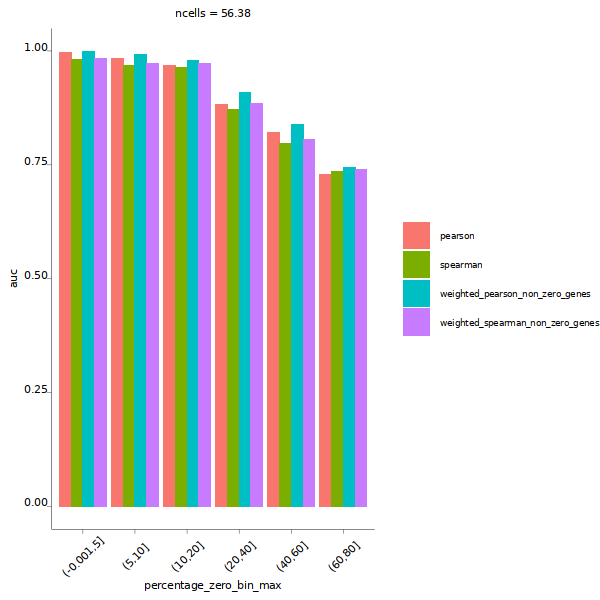

In [114]:
# Grouped
options(repr.plot.width=5, repr.plot.height=5)
auc_evaluation = ggplot(auc_df[auc_df$n_obs > 100,], aes(fill=variable, y=auc, x=percentage_zero_bin_max)) + 
    geom_bar(position="dodge", stat="identity") + plot_config + ggtitle(paste0( 'ncells = ', round(unique(auc_df$ncells), 2))) + theme(axis.text.x = element_text(angle = 45))

auc_evaluation

pdf(paste0('figures/A1_8/A1_8_AUC_evaluation_', variant, '_', coeqtl_variant,  '.pdf'), width =3.5, height =2.5)
print(auc_evaluation)
dev.off()

In [115]:
auc_df %>% arrange(-auc)

variable,ncells,percentage_zero_bin_max,auc,n_obs
<chr>,<dbl>,<fct>,<dbl>,<int>
weighted_pearson_non_zero_genes,56.37778,"(-0.001,5]",0.9993558,740
pearson,56.37778,"(-0.001,5]",0.9972550,740
weighted_pearson_non_zero_genes,56.37778,"(5,10]",0.9924907,577
weighted_spearman_non_zero_genes,56.37778,"(-0.001,5]",0.9838300,740
pearson,56.37778,"(5,10]",0.9831071,577
spearman,56.37778,"(-0.001,5]",0.9811362,740
weighted_pearson_non_zero_genes,56.37778,"(10,20]",0.9783276,749
weighted_spearman_non_zero_genes,56.37778,"(5,10]",0.9725219,577
weighted_spearman_non_zero_genes,56.37778,"(10,20]",0.9724208,749


In [116]:
### Save the plot as PDF

In [117]:
### Save the plot as PDF
pdf(paste0('figures/A1_8/A1_8_ROC_percentage_zero_correlation_based_', variant, '_', coeqtl_variant,  '.pdf'), width =5, height =3)
print(plot1)
dev.off()

pdf 
  2

# Combined MSE Plot 

In [118]:
### List all available MSE files

In [119]:
files = list.files( paste0('figures/A1_8/'))

In [120]:
files = files[!is.na(str_extract(files, 'MSE_table'))]

In [121]:
files = files[!is.na(str_extract(files, '3'))]

In [122]:
files

[1] "MSE_tablewijstB3.csv"     "MSE_tablewijstCD4_T3.csv"
[3] "MSE_tablewijstMono3.csv"  "MSE_tablewijstNK3.csv"

In [123]:
### Load the desired MSE tables

In [124]:
mse_data = data.frame()

In [125]:
for(i in files){
    data = fread(paste0('figures/A1_8/' ,i))
    mse_data = rbind(data, mse_data)
    }

In [126]:
unique(mse_data$variable)

[1] "pearson"                           "pearson_raw"                      
 [3] "scaled_spearman_ranks"             "spearman"                         
 [5] "spearman_raw"                      "weighted_pearson"                 
 [7] "weighted_pearson_non_zero_counts"  "weighted_pearson_non_zero_genes"  
 [9] "weighted_spearman"                 "weighted_spearman_non_zero_counts"
[11] "weighted_spearman_non_zero_genes"  "weighted_spearman_ranks"

In [127]:
### Filter on the correlation measures that should be included

In [128]:
cor_measures = c('pearson', 'spearman', 'weighted_pearson_non_zero_genes', 'weighted_spearman_non_zero_genes')

In [129]:
mse_data = mse_data[mse_data$variable %in% cor_measures,]

In [130]:
mse_data$variant = paste0(mse_data$variant, '\n (mean ncells \n =',  round(mse_data$ncells,2), ')')

In [131]:
mse_data

V1,variable,ncells,mse,variant
<int>,<chr>,<dbl>,<dbl>,<chr>
1,pearson,28.42222,0.002761774,wijstNK3 (mean ncells =28.42)
4,spearman,28.42222,0.003108368,wijstNK3 (mean ncells =28.42)
8,weighted_pearson_non_zero_genes,28.42222,0.002712053,wijstNK3 (mean ncells =28.42)
11,weighted_spearman_non_zero_genes,28.42222,0.003082598,wijstNK3 (mean ncells =28.42)
1,pearson,56.37778,0.002279858,wijstMono3 (mean ncells =56.38)
4,spearman,56.37778,0.002351631,wijstMono3 (mean ncells =56.38)
8,weighted_pearson_non_zero_genes,56.37778,0.002196253,wijstMono3 (mean ncells =56.38)
11,weighted_spearman_non_zero_genes,56.37778,0.002323707,wijstMono3 (mean ncells =56.38)
1,pearson,274.20000,0.002151788,wijstCD4_T3 (mean ncells =274.2)


In [132]:
mse_data$variable = str_replace(mse_data$variable, '_genes', '')

In [133]:
## Plot the MSE

In [134]:
options(repr.plot.width=10, repr.plot.height=5)
mse_plot = ggplot(mse_data, aes(reorder(variant, as.numeric(round(ncells,2))), reorder(variable, -mse))) +
  geom_tile(aes(fill = mse)) +
  geom_text(aes(label = round(mse, 6)), size = 2.5) +
  scale_fill_gradient(low = "white", high = "#db6b6a") + xlab('Scenario') + ylab('correlation measurement') + plot_config_heatmap# + facet_wrap(comparison~., scales = 'free')

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family 'Sans' not found in PostScript font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family 'Sans' not found in PostScript font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family 'Sans' not found in PostScript font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family 'Sans' not found in PostScript font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family 'Sans' not found in PostScript font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family 'Sans' not found in PostScript font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family 'Sans' not found in PostScript font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"fo

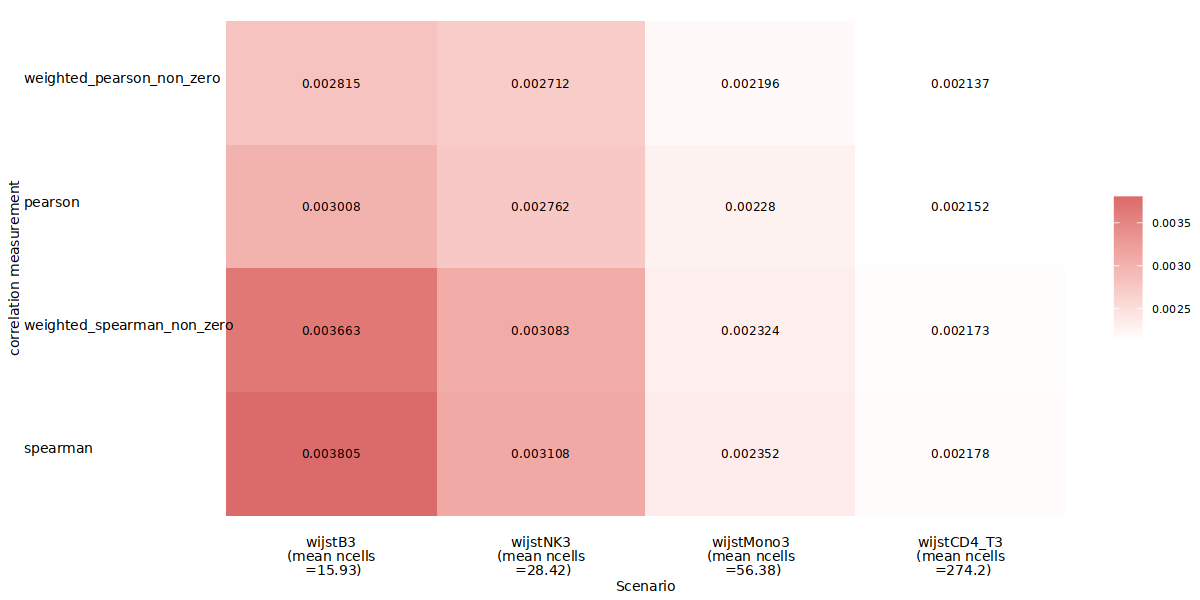

In [135]:
mse_plot

In [1695]:
### Save the plot as PDF
#pdf(paste0('figures/A1_8/A1_8_MSE_Combined_Plot',  '.pdf'), width =6, height =3)
ggsave(paste0('figures/A1_8/A1_8_MSE_Combined_Plot',  '.pdf'), plot =mse_plot, device = cairo_pdf, width =7.8, height =2)
#print(mse_plot)
#dev.off()

In [1696]:
### save the data
write.csv(mse_data, paste0('figures/A1_8/A1_8_MSE_Combined_Plot',  '_data.csv'))